In [149]:
# They say that if you analze data that it speaks to you. Here i have a data set of primarily a grocery store but they 
#also sell non-grocery items. I will analyze this data to see what its telling me. Here like most businesses, they desire to
# see what areas can they improve in. Here ill act as a data scientist to see what recommedations i can make 
# aw well as see what story is being told by the data. 

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image
import warnings; warnings.simplefilter('ignore')

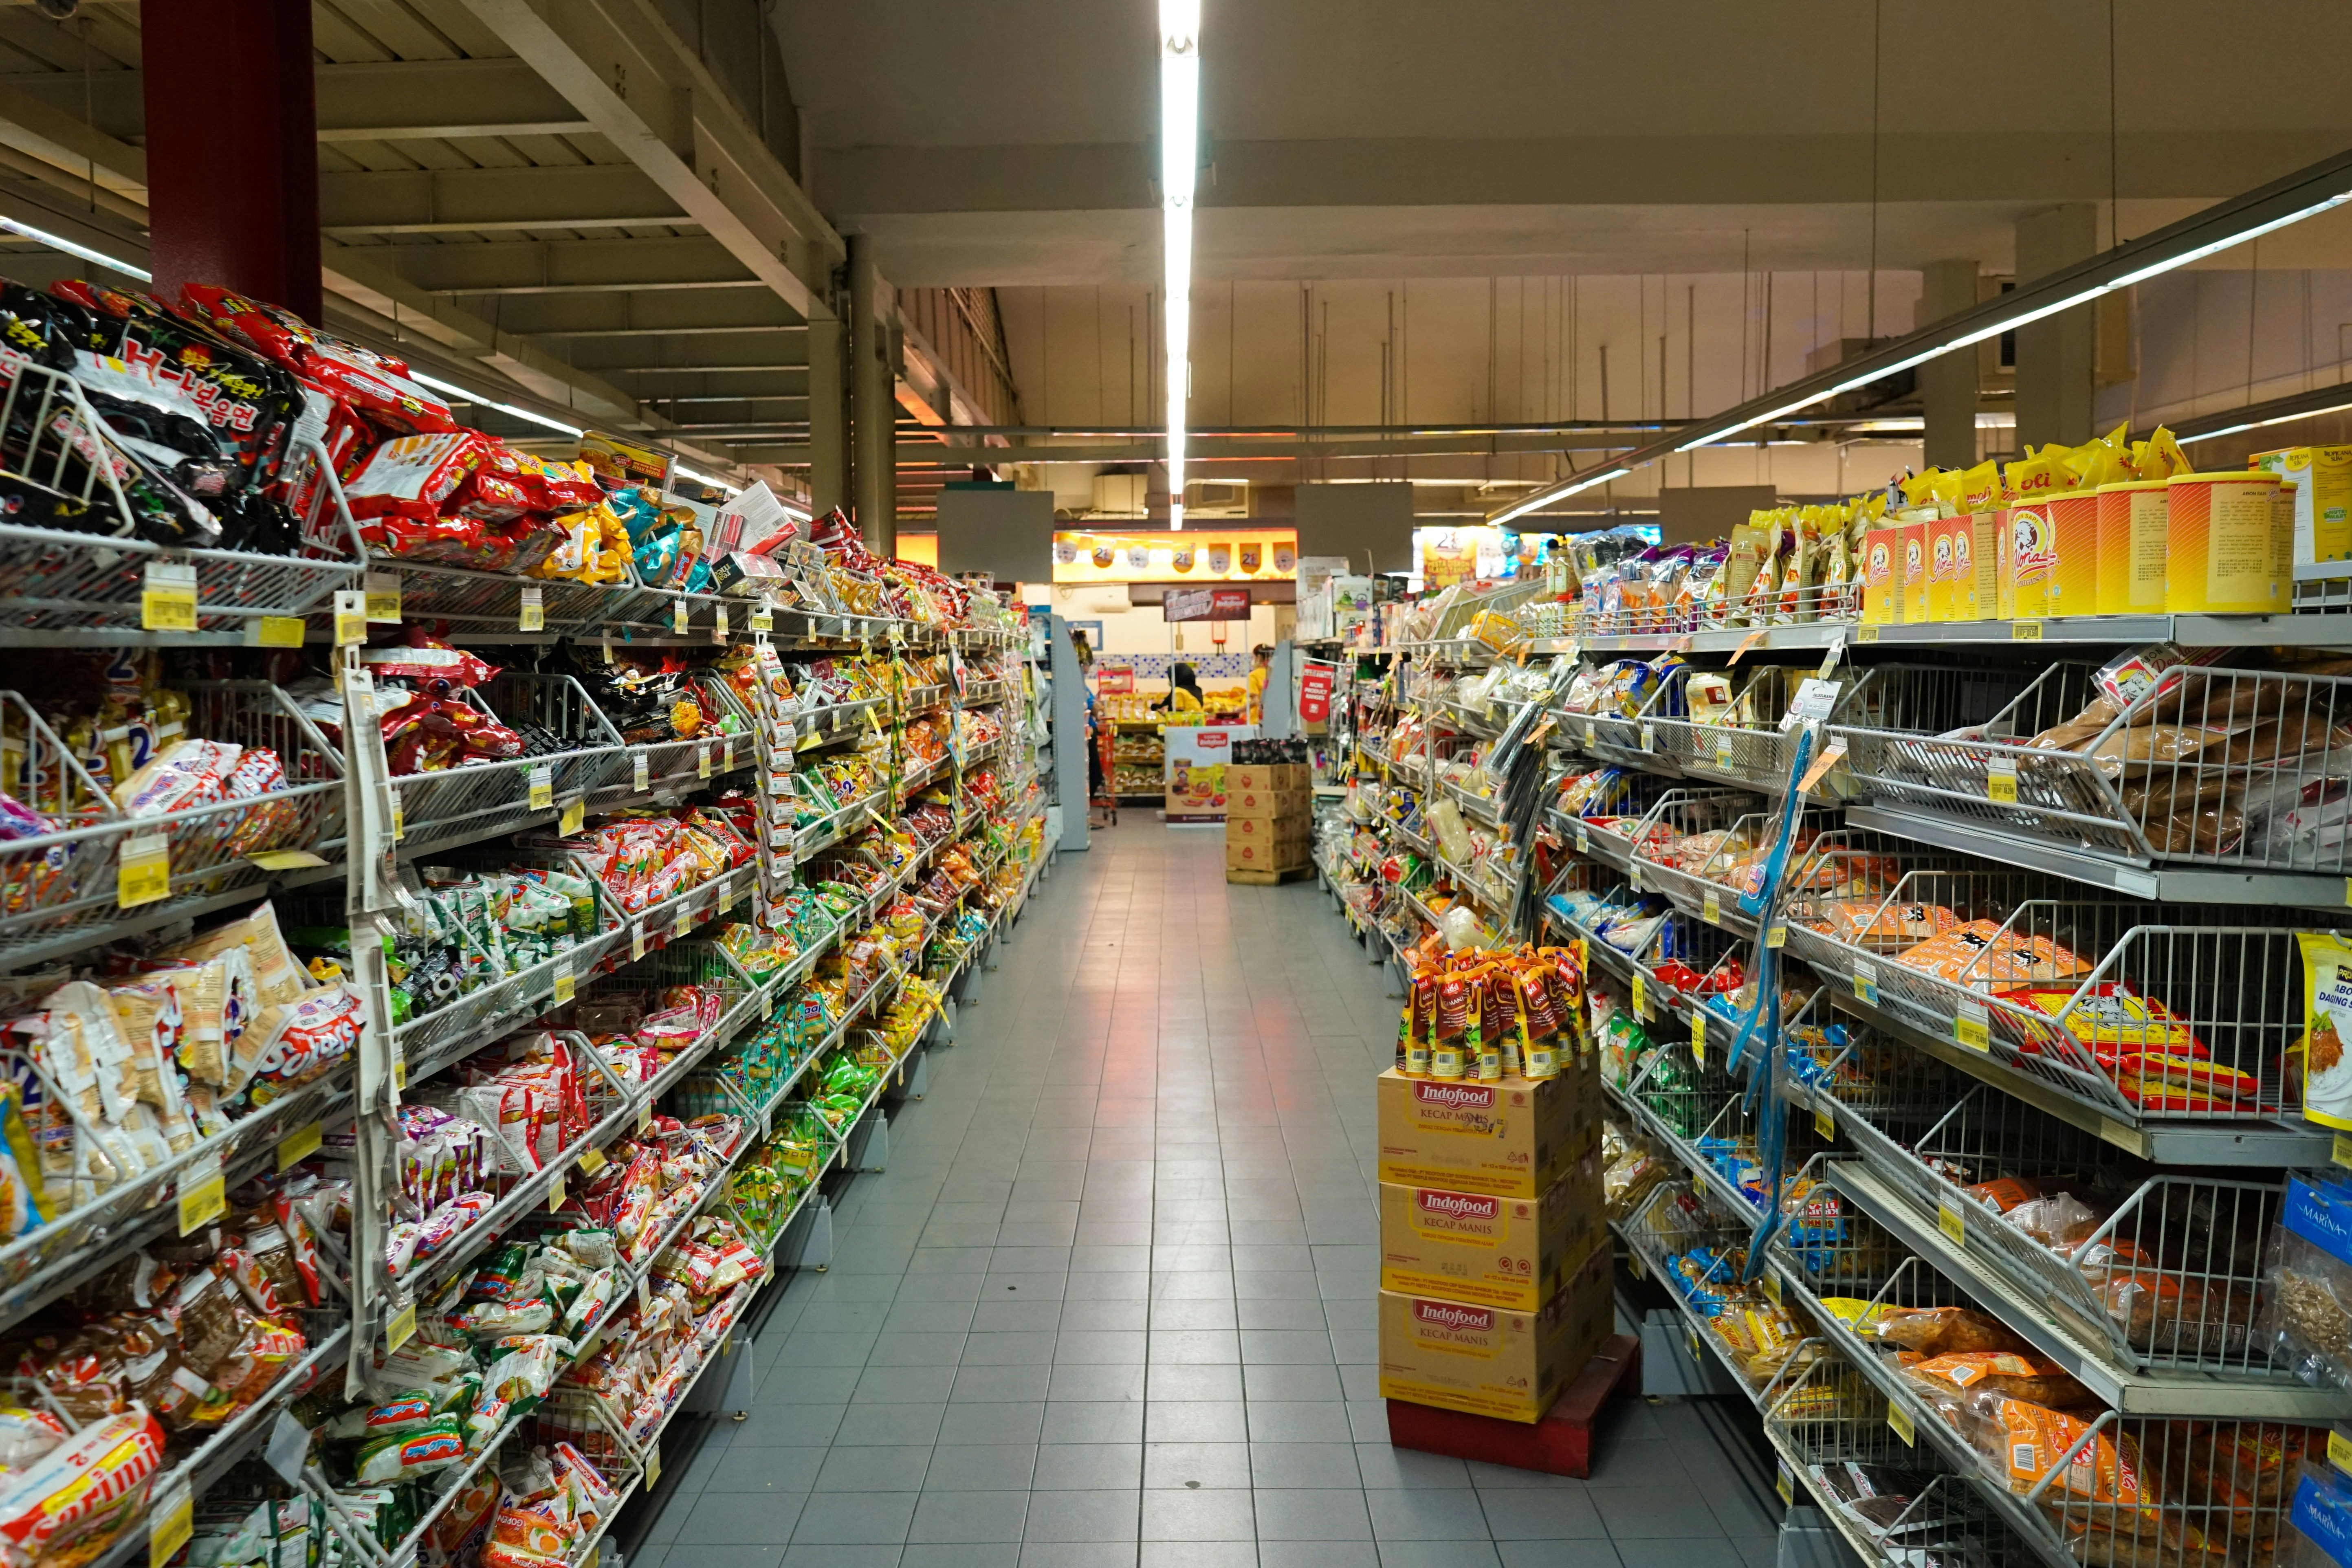

In [151]:
Image(filename='store.jpg', width=1000)

In [152]:
pf_groceries = pd.read_excel('pf_groceries.xls')

In [153]:
print(pf_groceries)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [154]:
#This pf groceries has over 9000 transactions and 21 features

In [155]:
pf_groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [156]:
pf_groceries.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [157]:
#Here im Creating the column Profit_Percentage to observe the profit percentage for all products

In [188]:
pf_groceries['Profit_Percentage']=(pf_groceries['Profit']/pf_groceries['Sales'])*100

<Axes: xlabel='Segment', ylabel='Count'>

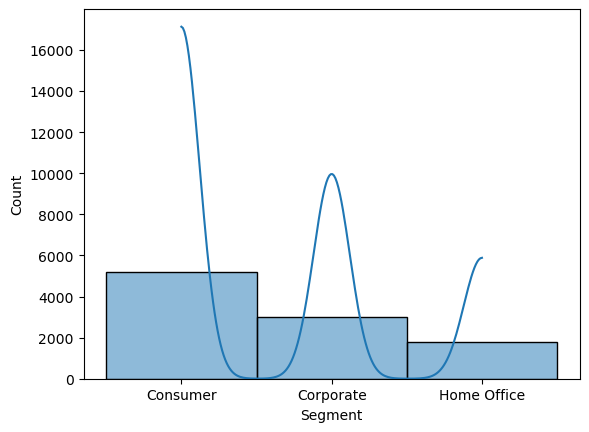

In [159]:
#Here im observing the segments
sns.histplot(data = pf_groceries['Segment'], kde = True)

<Axes: ylabel='Segment'>

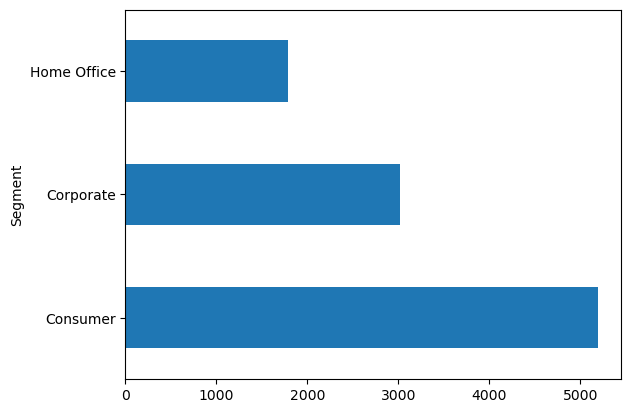

In [160]:
#Further looking into segments
pf_groceries['Segment'].value_counts().plot(kind='barh')

In [161]:
#From above we see 3 segments which are Consumer, Corporate and Home Office
#I will form 3 different datasets on 3 different segments:

In [162]:
pf_groceries_Consumer=pf_groceries[pf_groceries['Segment']=='Consumer']

In [163]:
pf_groceries_Corporate=pf_groceries[pf_groceries['Segment']=='Corporate']

In [164]:
pf_groceries_Home_Office=pf_groceries[pf_groceries['Segment']=='Home Office']

In [165]:
#Here i will Calculate the Average Profit % for each segment:

In [166]:
np.mean(pf_groceries_Consumer['Profit_Percentage'])

11.204952133156489

In [167]:
np.mean(pf_groceries_Corporate['Profit_Percentage'])

12.120260868746453

In [168]:
np.mean(pf_groceries_Home_Office['Profit_Percentage'])


14.28695850610337

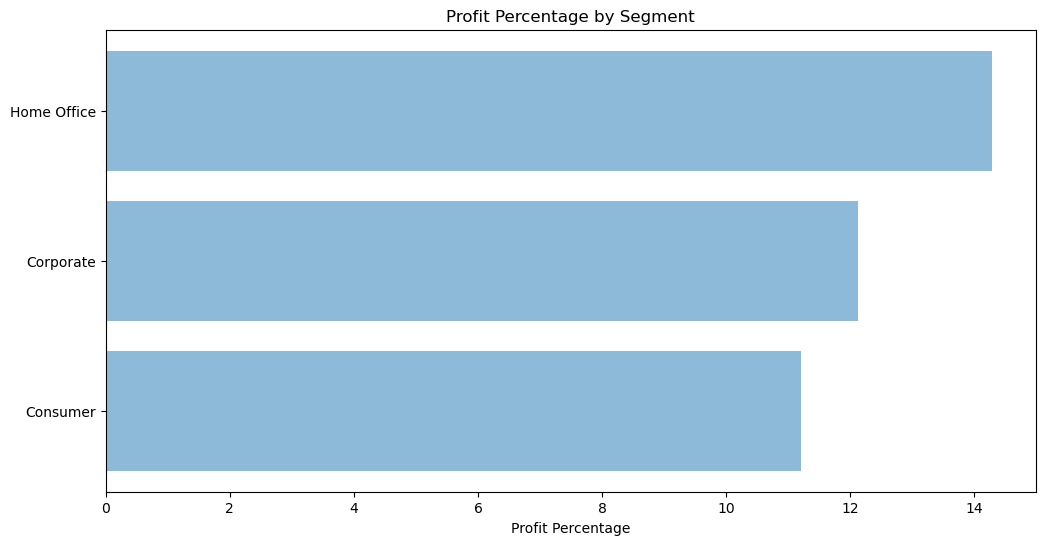

In [169]:
objects=['Consumer','Corporate','Home Office']
y_pos=np.arange(len(objects))
performance=[11.20,12.12,14.28]
plt.figure(figsize=(12,6))
plt.barh(y_pos,performance,align='center',alpha=.5)
plt.yticks(y_pos,objects)
plt.xlabel('Profit Percentage')
plt.title('Profit Percentage by Segment')
plt.show()

In [170]:
#Figure above expreses that the Home Office has the highest profit and Consumer category has the lowest profit.


In [171]:
#Here i will check the distribution of profit percentage for Consumer Segment.

In [172]:
pf_groceries_Consumer['Profit_Percentage'].describe()

count    5191.000000
mean       11.204952
std        47.846643
min      -275.000000
25%         6.250000
50%        27.000000
75%        36.250000
max        50.000000
Name: Profit_Percentage, dtype: float64

In [173]:
#The min value -275 tells us there are losses by some subcatogories.

In [174]:
# now im going to see which all of the subcategories are showing losses

In [175]:
avg_profit_consumer_gb=pf_groceries_Consumer.groupby('Sub-Category')['Profit_Percentage'].mean()
avg_profit_consumer_gb

Sub-Category
Accessories    20.460172
Appliances    -20.997268
Art            24.722547
Binders       -21.393269
Bookcases     -15.949371
Chairs          4.266705
Copiers        29.128571
Envelopes      41.767442
Fasteners      31.754386
Furnishings    13.325911
Labels         43.748677
Machines       -5.443191
Paper          42.588023
Phones         12.113636
Storage         8.098889
Supplies       10.577500
Tables        -15.824696
Name: Profit_Percentage, dtype: float64

In [176]:
#Here ill formulate a dataframe with the Profit_Percentage and group it by subcatergories


In [177]:
avg_profit_consumer_df=pd.DataFrame(avg_profit_consumer_gb)
avg_profit_consumer_df

Profit_Percentage
Sub-Category                   
Accessories           20.460172
Appliances           -20.997268
Art                   24.722547
Binders              -21.393269
Bookcases            -15.949371
Chairs                 4.266705
Copiers               29.128571
Envelopes             41.767442
Fasteners             31.754386
Furnishings           13.325911
Labels                43.748677
Machines              -5.443191
Paper                 42.588023
Phones                12.113636
Storage                8.098889
Supplies              10.577500
Tables               -15.824696

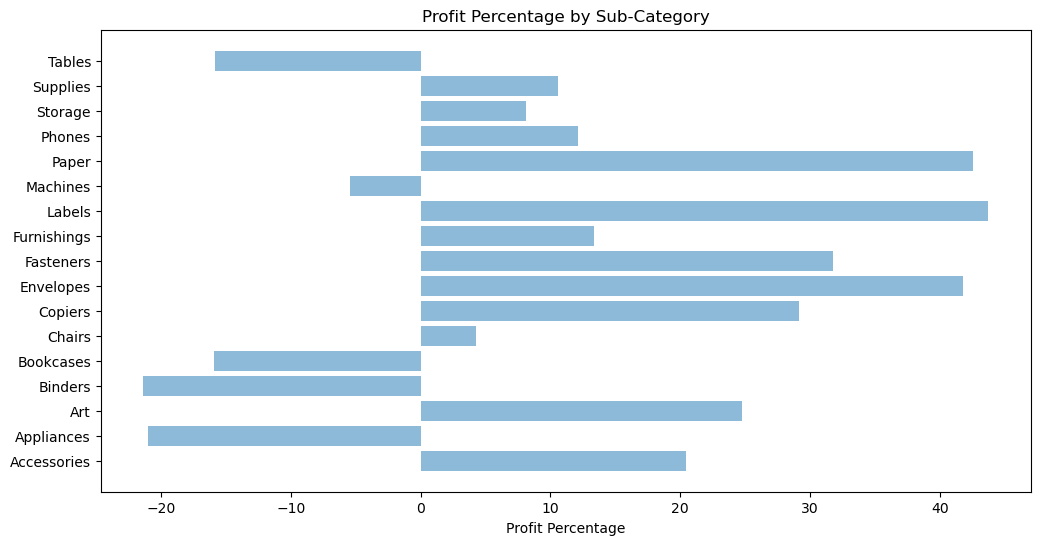

In [178]:
objects=avg_profit_consumer_df.index
y_pos=np.arange(len(objects))
performance=avg_profit_consumer_df['Profit_Percentage']
plt.figure(figsize=(12,6))
plt.barh(y_pos,performance,align='center',alpha=.5)
plt.yticks(y_pos,objects)
plt.xlabel('Profit Percentage')
plt.title('Profit Percentage by Sub-Category')
plt.show()

In [179]:
#The figure above tell us that the Appliances, Binders, bookcases,tables and Machines subcategories showing losses.
#Teams would need to compile a stregegy to get these products profitable or pursue a different options. 
